## Support Vector Machines

SVMs are supervised learning algorithms that can perform classification and regression tasks. It finds a hyperplane that best separates classes in feature space.

The technique used here in classification is to find a hyperplane in an N-dimensional space (N-number of features) that distinctly classifies the data points.

In [8]:
import sys; sys.path.append("..")
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## Dataset Generation

In [4]:

X, y = datasets.make_blobs(
        n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)
y = np.where(y == 0, -1, 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

In [6]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

## Model Training from Scratch

In [7]:
from xalgos.support_vector_machines_1 import SVM

clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print("Accuracy", accuracy(y_test, predictions))

Accuracy 1.0


## Datasets from Digits

In [10]:
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images,digits.target))
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [11]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

Flattening Images

In [12]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Dataset Splitting

In [13]:
trainTestSplit = int(n_samples*0.75)

## Model Training

In [14]:
model = svm.SVC()
model.fit(data[:trainTestSplit], digits.target[:trainTestSplit])

SVC()

## Prediction

In [15]:
target = digits.target[trainTestSplit:]
predictions = model.predict(data[trainTestSplit:])

## Evaluation

In [16]:
print(confusion_matrix(target,predictions))
print(accuracy_score(target,predictions))

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  2  0  2  6  0]
 [ 0  0  0  0 45  0  0  0  1  2]
 [ 0  0  0  0  0 44  1  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 44  1  0]
 [ 0  2  0  0  0  0  0  0 38  1]
 [ 0  0  0  1  0  1  0  1  1 41]]
0.9488888888888889


<AxesSubplot:>

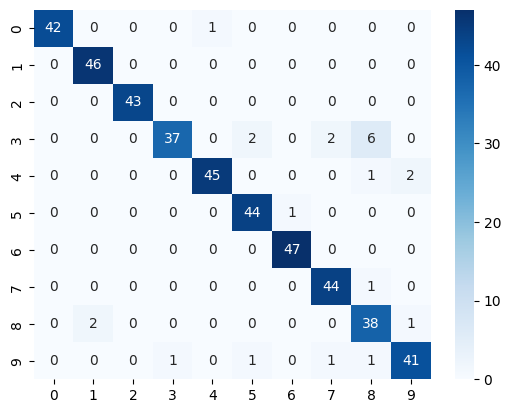

In [17]:
import seaborn as sns
sns.heatmap(confusion_matrix(target,predictions), annot=True, cmap='Blues')

Prediction for test image: [2]


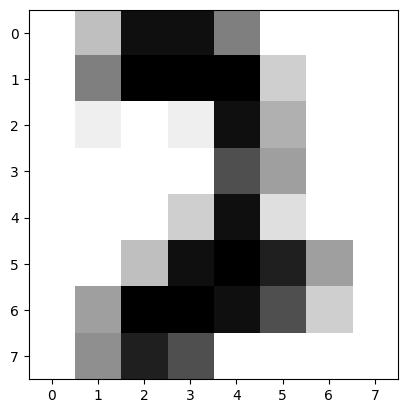

In [18]:
plt.imshow(digits.images[-55], cmap = plt.cm.gray_r, interpolation = "nearest")
print("Prediction for test image:", model.predict(data[-55].reshape(1,-1)))

plt.show()